In [ ]:
!pip install qiskit-ibm-runtime
!pip install rustworkx
!pip install 'qiskit[visualization]'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


QiskitRuntimeService.save_account(channel="ibm_quantum", token="a5c14e55260be39d4928a0f851dc4513f8d81e7c81b63b63f0d70d602bed0ed7d190f4ff14faedbc2552fa363286af446f511e6d16f6de4a6a343073c0c21174", overwrite=True, set_as_default=True)
service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.least_busy(min_num_qubits=127)
print(backend)


<IBMBackend('ibm_sherbrooke')>


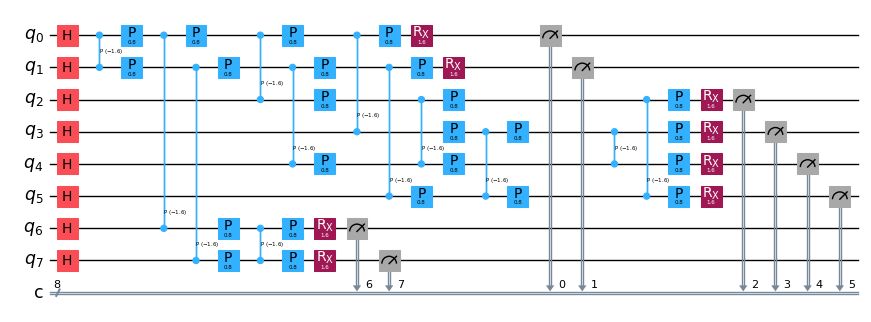


Transpilation successful!


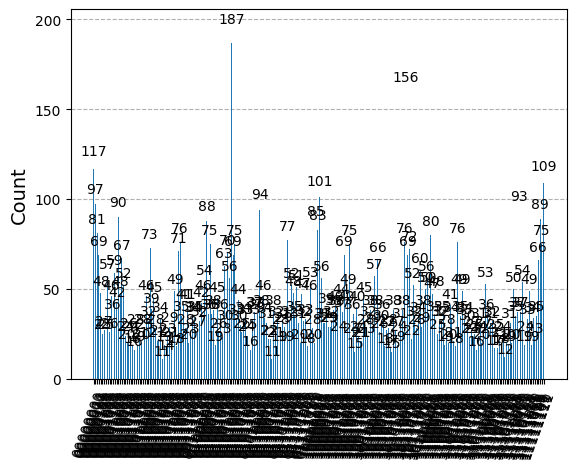

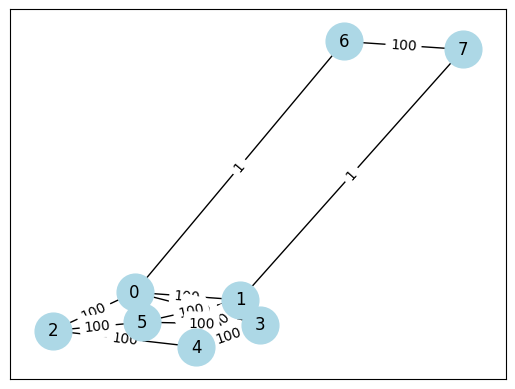

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Options, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler


# useful additional packages
# import math tools
import numpy as np
# We import the tools to handle general Graphs
import networkx as nx
# import plotting tools
import matplotlib.pyplot as plt
from matplotlib import cm
from pylatexenc import *

n = 8
V = np.arange(0,n,1)
#E =[(0,1,6.0),(1,0,6.0),(0,4,4.0),(0,5,6.0),(1,2,6.0),(1,3,6.0),(6,7,6.0),(7,6,6.0),(2,4,4.0),(2,5,4.0),(3,4,2.0),(3,5,2.0),(4,6,3.0),(3,7,4.0)]
E =[(0,1,100),(0,6,1),(1,7,1),(6,7,100),(0,2,100),(0,3,100),(1,4,100),(1,5,100),(3,5,100),(2,4,100),(3,4,100),(2,5,100)]
G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
# Draw the network with weights
pos = nx.spring_layout(G)  # Positioning of nodes
nx.draw_networkx(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=12)

# Add the edge labels with weights
edge_labels = nx.get_edge_attributes(G, 'weight')  # Get the weights of the edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Classical Preprocessing, Determine angles
step_size = 0.1;
a_gamma = np.arange(0, np.pi, step_size)
a_beta = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)
#F1 = 3-(np.sin(2*a_beta)**2*np.sin(2*a_gamma)**2-0.5*np.sin(4*a_beta)*np.sin(4*a_gamma))*(1+np.cos(4*a_gamma)**2)
#F1 = 3 - (np.sin(2 * a_beta) ** 2 * np.sin(2 * a_gamma) ** 2 - 0.5 * np.sin(4 * a_beta) * np.sin(4 * a_gamma)) * (1 + np.cos(4 * a_gamma) ** 2)

F1 =  4-(np.sin(2 * a_beta)**2 * np.sin(2 * a_gamma)**2 -
          0.5 * np.sin(4 * a_beta) * np.sin(4 * a_gamma)) * \
         (1 + np.cos(4 * a_gamma)**2) - \
         0.25 * np.sin(8 * a_beta) * np.sin(8 * a_gamma)
result = np.where(F1 == np.amin(F1))
result[0]*0.1
result[1]*0.1
a= list(zip(result[0],result[1]))[0]
gamma = a[0]*step_size;
beta = a[1]*step_size;

# prepare the quantum and classical resisters
QAOA = QuantumCircuit(len(V), len(V))
# apply the Hadamard gates to all qubits to have uniform superposition state
QAOA.h(range(len(V)))
#QAOA.barrier()
# to implement U(C, gamma), apply below equivalent circuit
# note here u1 is the phase shift gate
for edge in E:
    k = edge[0]
    l = edge[1]
    QAOA.cp(-2*gamma, k, l)
    QAOA.p(gamma, k)
    QAOA.p(gamma, l)

# to implement U(B, beta), apply R_x(2*beta) to all qubits
#QAOA.barrier()
QAOA.rx(2*beta, range(len(V)))
# Measure the result in the computational basis
#QAOA.barrier()
QAOA.measure(range(len(V)),range(len(V)))

display(QAOA.draw(output='mpl', fold=60, scale=0.5, style={'fontsize': 20}))
fig=(QAOA.draw(output='mpl', fold=60, scale=0.5, style={'fontsize': 20}))
#for ax in fig.axes:
#    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#                 ax.get_xticklabels() + ax.get_yticklabels()):
#        item.set_fontsize(14)  # Set desired font size

fig.savefig("circuit.pdf", format="pdf")  # Save as PDF
fig.savefig("circuit.eps", format="eps")  # Save as EPS
plt.show
#fig.savefig("circuit.pdf", format="pdf")  # Save as PDF
#fig.savefig("circuit.eps", format="eps")  # Save as EPS
# Transpile with explicit basis gates and coupling map
try:
    transpiled_qc = transpile(
        QAOA,
        backend=backend,
        #basis_gates=backend_config.basis_gates,  # Use backend's basis gates
        #coupling_map=backend_config.coupling_map,  # Use backend's coupling map
        optimization_level=3,  # Set optimization level (0-3)
        translation_method='synthesis' # Explicitly set the translation method to 'synthesis' or 'unroller'
    )
    print("\nTranspilation successful!")
except Exception as e:
    print(f"Error during transpilation: {e}")
    raise

# If using qiskit-ibm-runtime<0.24.0, change `mode=` to `backend=`
sampler = Sampler(mode=backend)
sampler.options.default_shots = 2000

# Set simple error suppression/mitigation options
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"
sampler.options.twirling.enable_gates = True
sampler.options.twirling.num_randomizations = "auto"

pub= (transpiled_qc, )
job = sampler.run([pub], shots=int(1e4))
result=job.result()
bit_array = result[0].data.c

counts = result[0].data.c.get_counts()
#print(counts)
plot_histogram(counts)



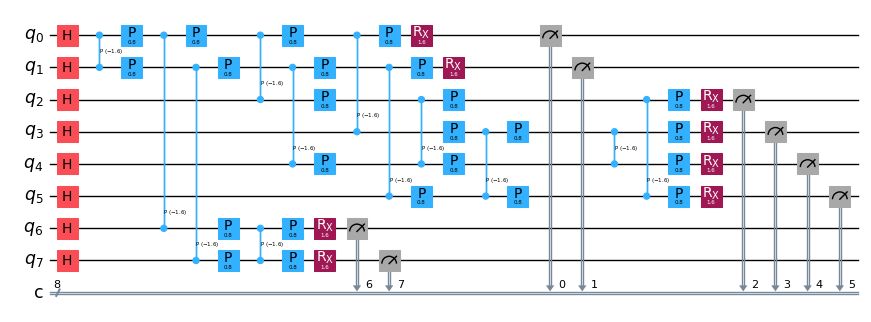

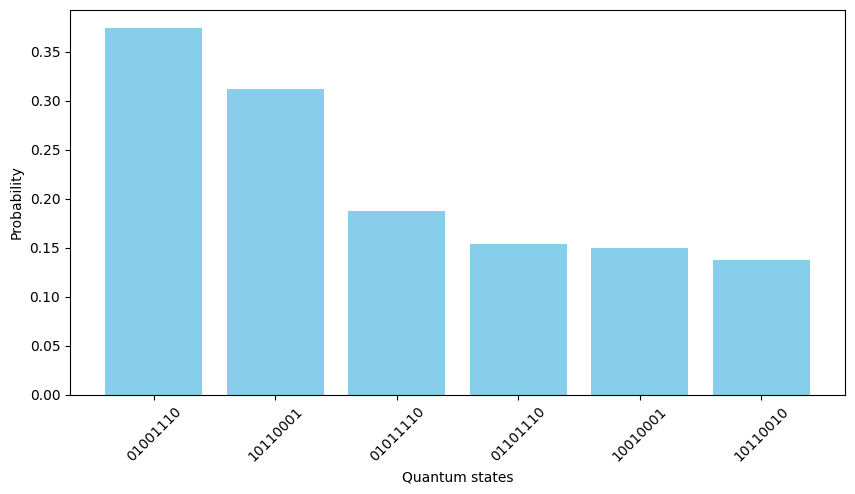

In [ ]:
#print(bit_array)
#print(counts)
# Sort dictionary by values in descending order
display(QAOA.draw(output='mpl', fold=60, scale=0.5, style={'fontsize': 20}))
fig=(QAOA.draw(output='mpl', fold=60, scale=0.5, style={'fontsize': 20}))
#for ax in fig.axes:
#    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#                 ax.get_xticklabels() + ax.get_yticklabels()):
#        item.set_fontsize(14)  # Set desired font size

fig.savefig("circuit1.pdf", format="pdf")  # Save as PDF
fig.savefig("circuit1.eps", format="eps")  # Save as EPS
bit_array = result[0].data.c

counts = result[0].data.c.get_counts()
top_10 = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:30]

# Extract keys (binary strings) and values (frequencies)
keys, values = zip(*top_10)

total_counts = sum(counts.values())  # Get total shots
real_value_array = 2*np.array(values) / 1000  # Normalize

selected_indices = [0,1,6,15,20,27]  # Corresponds to 1st, 3rd, 5th, and 7th
selected_keys = [keys[i] for i in selected_indices]
selected_values = [real_value_array[i] for i in selected_indices]

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(selected_keys, selected_values, color='skyblue')
plt.xlabel("Quantum states")
plt.ylabel("Probability")
#plt.title("Top 10 Highest Counts")
plt.xticks(rotation=45)
plt.show()


In [ ]:
print